## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for bn in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BATCH SIZE = %.6f" % (bn))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=bn,
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-BATCH_SIZE-%s" % (str(bn))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with BATCH SIZE = 2.000000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
________________________________

50000/50000 [==============================] - 489s 10ms/step - loss: 2.2682 - acc: 0.1422 - val_loss: 2.9362 - val_acc: 0.1386
Epoch 45/50
50000/50000 [==============================] - 491s 10ms/step - loss: 2.2690 - acc: 0.1396 - val_loss: 3.3382 - val_acc: 0.1208
Epoch 46/50
50000/50000 [==============================] - 491s 10ms/step - loss: 2.2653 - acc: 0.1443 - val_loss: 3.2507 - val_acc: 0.1565
Epoch 47/50
50000/50000 [==============================] - 490s 10ms/step - loss: 2.2582 - acc: 0.1497 - val_loss: 3.1794 - val_acc: 0.1529
Epoch 48/50
50000/50000 [==============================] - 492s 10ms/step - loss: 2.2541 - acc: 0.1500 - val_loss: 2.8307 - val_acc: 0.1727
Epoch 49/50
50000/50000 [==============================] - 499s 10ms/step - loss: 2.2510 - acc: 0.1483 - val_loss: 3.2549 - val_acc: 0.1702
Epoch 50/50
50000/50000 [==============================] - 491s 10ms/step - loss: 2.2459 - acc: 0.1514 - val_loss: 4.0028 - val_acc: 0.1448
Experiment with BATCH SIZE = 16.

50000/50000 [==============================] - 73s 1ms/step - loss: 1.1336 - acc: 0.5959 - val_loss: 1.3777 - val_acc: 0.5225
Epoch 43/50
50000/50000 [==============================] - 74s 1ms/step - loss: 1.1279 - acc: 0.6001 - val_loss: 1.3564 - val_acc: 0.5254
Epoch 44/50
50000/50000 [==============================] - 73s 1ms/step - loss: 1.1236 - acc: 0.5981 - val_loss: 1.3660 - val_acc: 0.5210
Epoch 45/50
50000/50000 [==============================] - 73s 1ms/step - loss: 1.1183 - acc: 0.6019 - val_loss: 1.4064 - val_acc: 0.5128
Epoch 46/50
50000/50000 [==============================] - 73s 1ms/step - loss: 1.1133 - acc: 0.6043 - val_loss: 1.4414 - val_acc: 0.5034
Epoch 47/50
50000/50000 [==============================] - 73s 1ms/step - loss: 1.1080 - acc: 0.6042 - val_loss: 1.4677 - val_acc: 0.4914
Epoch 48/50
50000/50000 [==============================] - 73s 1ms/step - loss: 1.1010 - acc: 0.6109 - val_loss: 1.4036 - val_acc: 0.5123
Epoch 49/50
50000/50000 [=====================

50000/50000 [==============================] - 40s 803us/step - loss: 0.8725 - acc: 0.6880 - val_loss: 1.5441 - val_acc: 0.4941
Epoch 41/50
50000/50000 [==============================] - 41s 810us/step - loss: 0.8499 - acc: 0.6959 - val_loss: 1.5226 - val_acc: 0.5105
Epoch 42/50
50000/50000 [==============================] - 40s 806us/step - loss: 0.8469 - acc: 0.6965 - val_loss: 1.5657 - val_acc: 0.4986
Epoch 43/50
50000/50000 [==============================] - 41s 828us/step - loss: 0.8482 - acc: 0.6970 - val_loss: 1.5514 - val_acc: 0.5019
Epoch 44/50
50000/50000 [==============================] - 40s 805us/step - loss: 0.8393 - acc: 0.7003 - val_loss: 1.5938 - val_acc: 0.4928
Epoch 45/50
50000/50000 [==============================] - 41s 819us/step - loss: 0.8454 - acc: 0.6986 - val_loss: 1.5338 - val_acc: 0.5103
Epoch 46/50
50000/50000 [==============================] - 40s 803us/step - loss: 0.8322 - acc: 0.7046 - val_loss: 1.5179 - val_acc: 0.5059
Epoch 47/50
50000/50000 [=======

50000/50000 [==============================] - 17s 343us/step - loss: 0.3967 - acc: 0.8648 - val_loss: 2.2025 - val_acc: 0.4571
Epoch 39/50
50000/50000 [==============================] - 17s 339us/step - loss: 0.3984 - acc: 0.8623 - val_loss: 2.1398 - val_acc: 0.4715
Epoch 40/50
50000/50000 [==============================] - 17s 339us/step - loss: 0.3736 - acc: 0.8701 - val_loss: 2.2279 - val_acc: 0.4606
Epoch 41/50
50000/50000 [==============================] - 17s 343us/step - loss: 0.3542 - acc: 0.8781 - val_loss: 2.3580 - val_acc: 0.4558
Epoch 42/50
50000/50000 [==============================] - 17s 342us/step - loss: 0.3458 - acc: 0.8828 - val_loss: 2.3662 - val_acc: 0.4439
Epoch 43/50
50000/50000 [==============================] - 17s 342us/step - loss: 0.3398 - acc: 0.8832 - val_loss: 2.3548 - val_acc: 0.4629
Epoch 44/50
50000/50000 [==============================] - 17s 342us/step - loss: 0.3252 - acc: 0.8895 - val_loss: 2.4154 - val_acc: 0.4674
Epoch 45/50
50000/50000 [=======

50000/50000 [==============================] - 14s 271us/step - loss: 0.3770 - acc: 0.8825 - val_loss: 2.2062 - val_acc: 0.4591
Epoch 37/50
50000/50000 [==============================] - 14s 272us/step - loss: 0.3537 - acc: 0.8893 - val_loss: 2.0087 - val_acc: 0.4726
Epoch 38/50
50000/50000 [==============================] - 14s 270us/step - loss: 0.3302 - acc: 0.8984 - val_loss: 2.1331 - val_acc: 0.4768
Epoch 39/50
50000/50000 [==============================] - 14s 272us/step - loss: 0.3190 - acc: 0.9018 - val_loss: 2.0969 - val_acc: 0.4701
Epoch 40/50
50000/50000 [==============================] - 14s 275us/step - loss: 0.3032 - acc: 0.9077 - val_loss: 2.1788 - val_acc: 0.4727
Epoch 41/50
50000/50000 [==============================] - 14s 273us/step - loss: 0.2899 - acc: 0.9111 - val_loss: 2.2995 - val_acc: 0.4597
Epoch 42/50
50000/50000 [==============================] - 14s 274us/step - loss: 0.2717 - acc: 0.9197 - val_loss: 2.2838 - val_acc: 0.4633
Epoch 43/50
50000/50000 [=======

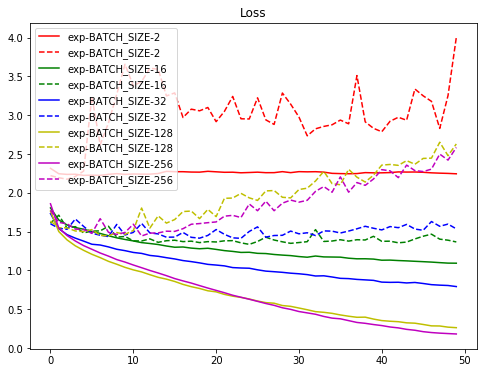

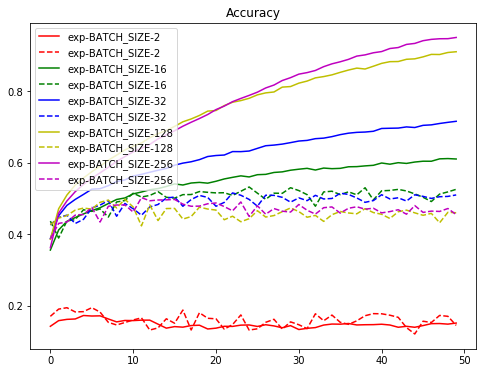

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k", "c", "peru" , "orange", "pink"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()